# Proyecto. Ciencia de Datos
## Brian Gabriel Barajas Guerrero


The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city.
Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("Downloads\ewC\Air_Quality.csv")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
#df.dropna(axis=0, how='any')
df =df.dropna(axis=0, how='all') 
df = df.drop('Unnamed: 15',axis=1)
df = df.drop('Unnamed: 16',axis=1)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [6]:
d=df["NMHC(GT)"].replace(-200, pd.NaT)
d.fillna(d.median(), inplace=True)
print(d.mean())
print(d)
df["NMHC(GT)"]=d

156.72159880303516
0       150.0
1       112.0
2        88.0
3        80.0
4        51.0
        ...  
9352    150.0
9353    150.0
9354    150.0
9355    150.0
9356    150.0
Name: NMHC(GT), Length: 9357, dtype: float64


In [7]:
for i in df:
    #a=df[i][0]
    #print(type(a))
    if type(df[i][0]) == np.float64:
        #print("si")
        d=df[i].replace(-200, pd.NaT)
        d.fillna(d.median(), inplace=True)
        df[i]=d
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10:00:00,3.1,1314.0,150.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11:00:00,2.4,1163.0,150.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12:00:00,2.4,1142.0,150.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13:00:00,2.1,1003.0,150.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
df_diario = df.drop('Time',axis=1)
df1 = df_diario.loc[0:1213]
df2 =  df_diario.loc[1213:2213]
df3 =  df_diario.loc[2213:3213]
df4 =  df_diario.loc[3213:4213]
df5 =  df_diario.loc[4213:5213]
df6 =  df_diario.loc[5213:6213]
df7 =  df_diario.loc[6213:7213]
df8 =  df_diario.loc[7213:8213]
df9 =  df_diario.loc[8213:9356]

df1=df1.groupby('Date').sum()
df2=df2.groupby('Date').sum()
df3=df3.groupby('Date').sum()
df4=df4.groupby('Date').sum()
df5=df5.groupby('Date').sum()
df6=df6.groupby('Date').sum()
df7=df7.groupby('Date').sum()
df8=df8.groupby('Date').sum()
df9=df9.groupby('Date').sum()

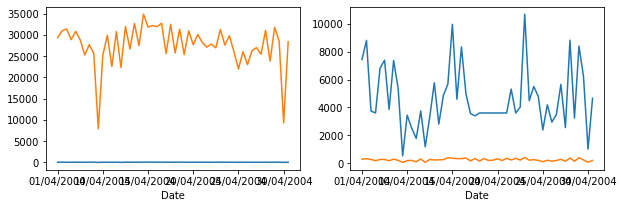

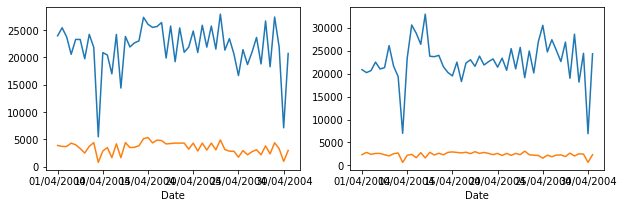

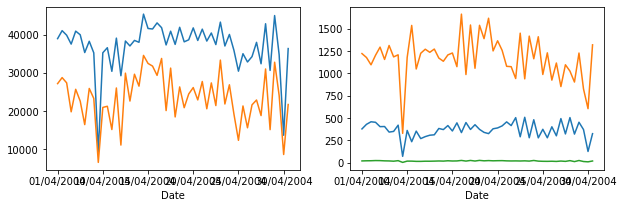

In [9]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df1[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df1[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df1[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df1[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()




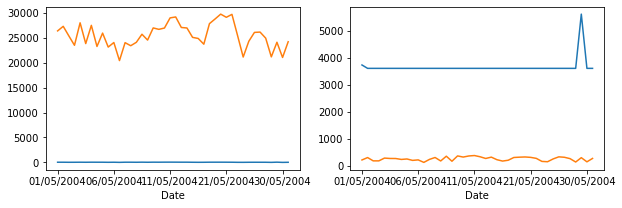

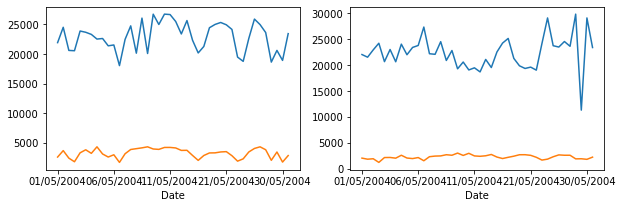

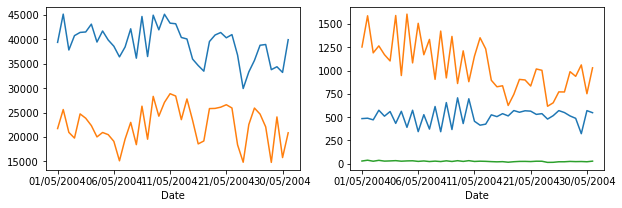

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df2[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df2[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df2[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df2[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


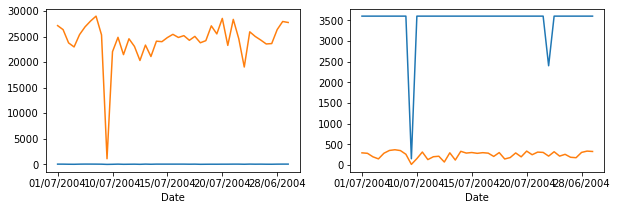

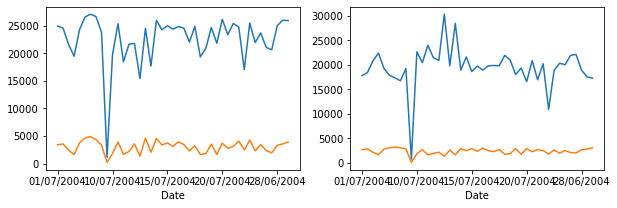

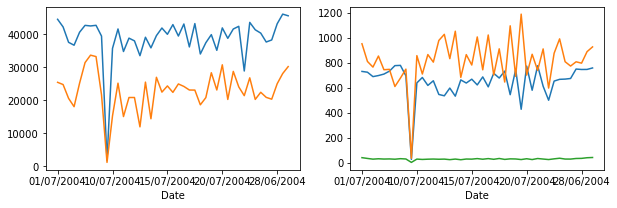

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df3[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df3[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df3[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df3[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


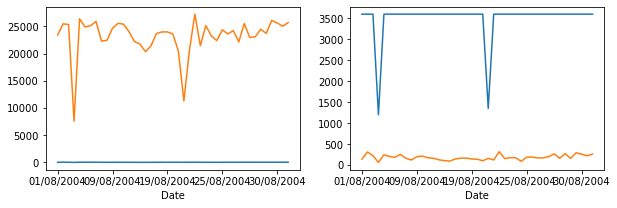

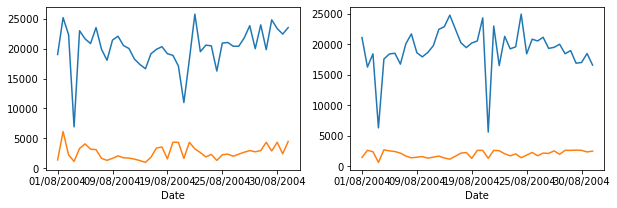

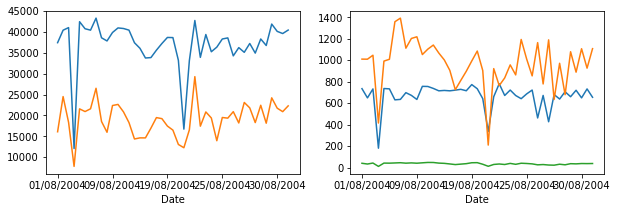

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df4[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df4[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df4[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df4[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


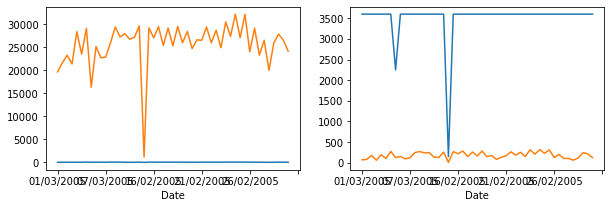

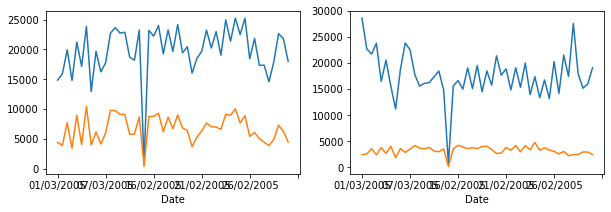

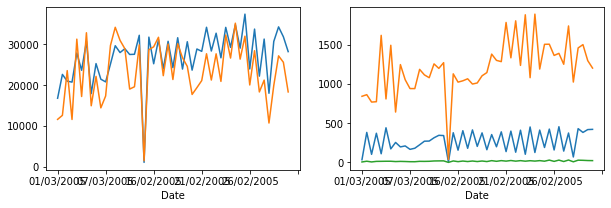

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['CO(GT)', 'PT08.S1(CO)']].plot(ax = ax[0])
#ax[0].set_title('Random int')
ax[0].get_legend().remove()

df9[['NMHC(GT)', 'C6H6(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['PT08.S2(NMHC)', 'NOx(GT)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df9[['PT08.S3(NOx)', 'NO2(GT)']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()

fig, ax = plt.subplots(1,2, figsize=(10,3))
df9[['PT08.S4(NO2)', 'PT08.S5(O3)']].plot(ax = ax[0])
#ax[0].set_title('Random normal')
ax[0].get_legend().remove()

df9[['T', 'RH', 'AH']].plot(ax = ax[1])
#ax[1].set_title('Random normal')
ax[1].get_legend().remove()


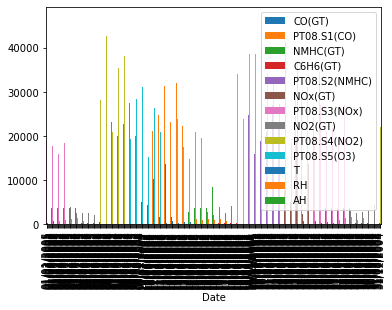

In [14]:
df_diario=df_diario.groupby('Date').sum().plot.bar()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC, SVR
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [29]:
regression = LinearRegression()
X = df[['RH']]
y_NO2 = df[['NO2(GT)']]
y_C6H6 = df[['C6H6(GT)']]

regression.fit(X, y_NO2)
pred_NO2 = regression.predict(X)

regression.fit(X, y_C6H6)
pred_C6H6 = regression.predict(X)



In [23]:
df_diario[['RH']]

,RH
Date,
01/01/2005,1219.1
01/02/2005,1241.8
01/03/2005,842.5
01/04/2004,1222.6
01/04/2005,863.1
...,...
31/05/2004,1028.9
31/07/2004,926.7
31/08/2004,1108.4


In [31]:
df['target'] = df_diario['Date']
le = preprocessing.LabelEncoder()
y = le.fit_transform(df[['NO2(GT)']])
X = df.drop(columns=['NO2(GT)']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )

KeyError: 'Date'

In [ ]:
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [ ]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [18]:
df_diario = df.drop('Time',axis=1)
df_diario=df_diario.groupby('Date').sum()
df_diario

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
01/01/2005,50.9,26742.0,3600.0,172.4,20491.0,7206.0,18779.0,3043.0,24783.0,29434.0,164.9,1219.1,11.9753
01/02/2005,68.8,30004.0,3600.0,287.7,24398.0,11726.0,15475.0,3857.0,28426.0,37418.0,159.0,1241.8,12.1005
01/03/2005,24.5,19684.0,3600.0,70.4,14854.0,4382.0,28604.0,2396.0,16778.0,11585.0,34.4,842.5,5.7601
01/04/2004,61.2,29321.0,7443.0,276.0,23946.0,3890.0,20912.0,2334.0,38921.0,27162.0,379.3,1222.6,20.9387
01/04/2005,27.3,21679.0,3600.0,81.9,15912.0,3884.0,22725.0,2576.0,22638.0,12575.0,382.3,863.1,15.2767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/05/2004,37.6,24168.0,3600.0,264.5,23451.0,2841.0,23387.0,2250.0,39920.0,20838.0,547.0,1028.9,26.6709
31/07/2004,43.7,25017.0,3600.0,220.5,22444.0,2393.0,18505.0,2362.0,39606.0,20910.0,733.1,926.7,37.0872
31/08/2004,46.8,25688.0,3600.0,258.9,23539.0,4455.0,16616.0,2492.0,40439.0,22294.0,655.2,1108.4,37.9856


In [ ]:
df_diario.plot()